## 1. Defining the Question


The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account.

## a) Specifying the question

## b) Defining Metric of succes

## c) Understanding the context

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

## d) Recording the experimental design

## e) Data Relevance

The data we have is parsimonous :)

# Reading the dataset


In [0]:
# Importing our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Data from the source i.e. csv
# Dataset url = http://bit.ly/FinancialDataset

financial_df = pd.read_csv("http://bit.ly/FinancialDataset")

## 3. Checking the data

In [47]:
# Determining the no. of records in our dataset
#
financial_df.shape

(23524, 13)

In [48]:
# Previewing the top of our dataset
financial_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [49]:
# preview the bottom of our dataset
#
financial_df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [50]:
# Checking whether each column has an appropriate datatype
#
financial_df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

# External Validation

# Tidying up the dataset


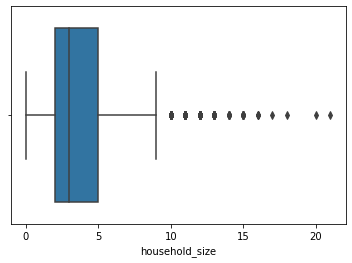

In [51]:

# Checking for outliers
#
ax = sns.boxplot(x=fin_df["household_size"])


In [52]:
# Checking for missing data
#
financial_df.isnull().values.any()

True

In [0]:
# Dealing with missing data
#
fin_df = financial_df.dropna()

In [54]:
fin_df.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [55]:
# Renaming columns into having underscores
fin_df.rename(columns={'level of education':'level_of_education','The relathip with head':'Relationship_with_the_head', 'Respondent Age':'Respondent_Age' })

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent_Age,gender_of_respondent,Relationship_with_the_head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [56]:
# Checking for anomalies
#
q1_HS = fin_df['household_size'].quantile(.25)
q3_HS = fin_df['household_size'].quantile(.75)

iqr_HS = q3_HS - q1_HS
print(iqr_HS)

3.0


# Exploratory analysis

Univarient Analysis


In [57]:
fin_df.describe()
# this command describes a lot about the data showing some of the measures of central tendency like  mean mode median etc

,year,household_size,Respondent Age
count,23343.000000,23343.000000,23343.000000
mean,2016.980594,3.688643,38.805509
std,0.901740,2.281184,16.519803
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


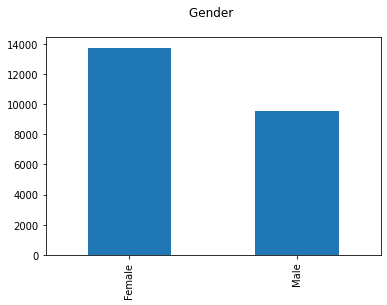

In [58]:
# plotting the univarient variables to see the insights they give us
# starting with the categorical ones
#
fin_df['gender_of_respondent'].value_counts().plot.bar(title='Gender \n')

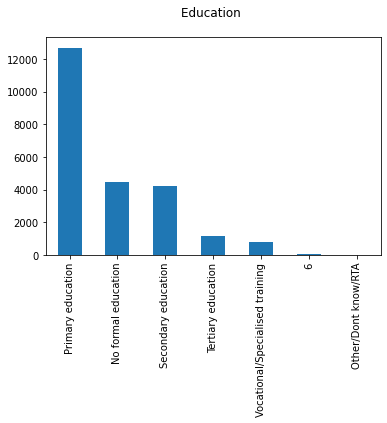

In [59]:
fin_df['Level of Educuation'].value_counts().plot.bar(title='Education \n')

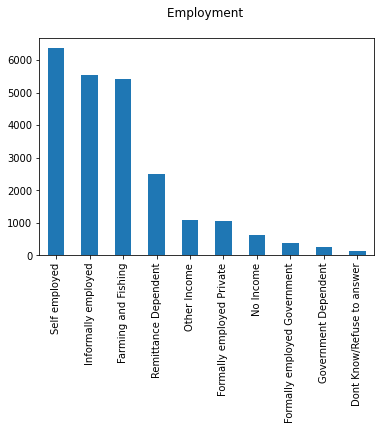

In [60]:
fin_df['Type of Job'].value_counts().plot.bar(title='Employment \n')

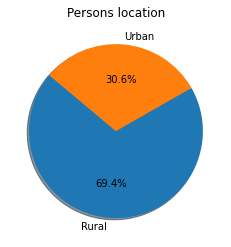

In [61]:
# now for the numerical variables
#
size = fin_df.groupby(['Type of Location'])['household_size'].sum()
status = ['Rural',  'Urban']
plt.pie(size, labels = status, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.title('Persons location')
plt.show()

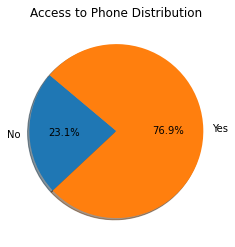

In [62]:
size = fin_df.groupby(['Cell Phone Access'])['household_size'].sum()
status = ['No',  'Yes']
plt.pie(size, labels = status, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.title('Access to Phone Distribution')
plt.show()

Bivarient analysis

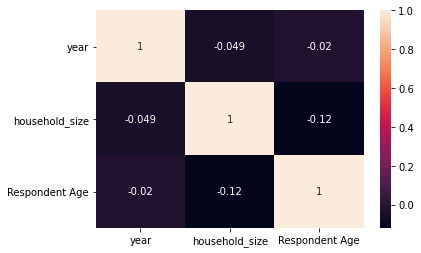

In [63]:
# First we check the correlation between our variables
# 
sns.heatmap(financial_df.corr(),annot=True)
plt.show()

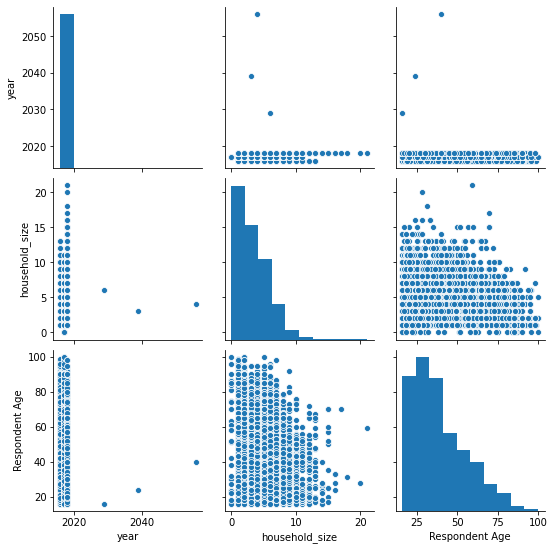

In [64]:
# Plotting bivarient summaries
#
sns.pairplot(fin_df)
plt.show()

# Multivarient analysis


In [65]:
fin_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [66]:
## Step 1: pre-processing
#
X = fin_df.dropna('Has_a_Bank_account',1)
y = fin_df['Has_a_Bank_account']

ValueError: ignored

In [67]:
## Step 2: splitting our dataset into training set and testing set
#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

NameError: ignored

In [68]:
## Step 3 : Normalization
#
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

NameError: ignored

In [69]:
##Step 4 : Applyin PCA
#
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

NameError: ignored

In [70]:
# Step 5 : explained Variance Ratio
#
explained_variance = pca.explained_variance_ratio_


AttributeError: ignored

# Implementing the solution

From our solution i have been able to come up with afew insights these are bades on the univarient and bivarient analysis because i wasnt very well conversant with multi varient i did it on a trial error basis.

# New Section